In [ ]:
omoni import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_test = pd.read_csv('/content/test.csv')
df_train = pd.read_csv('/content/train.csv')

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
df_train.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [ ]:
df_test.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,4
LotFrontage,227
LotArea,0
...,...
MiscVal,0
MoSold,0
YrSold,0
SaleType,1


In [ ]:
# 最頻値で補完
df_test['Alley'] = df_test['Alley'].fillna(df_test['Alley'].mode()[0])
df_train['Alley'] = df_train['Alley'].fillna(df_train['Alley'].mode()[0])

In [ ]:
# 平均で補完
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())

In [ ]:
# 最頻値で補完
df_test['MSZoning'] = df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0])

In [ ]:
# 最頻値で補完
df_test['Utilities'] = df_test['Utilities'].fillna(df_test['Utilities'].mode()[0])

In [ ]:
# 最頻値で補完
df_train['BsmtQual'] = df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0])
df_train['BsmtCond'] = df_train['BsmtCond'].fillna(df_train['BsmtCond'].mode()[0])
df_test['BsmtQual'] = df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0])
df_test['BsmtCond'] = df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0])

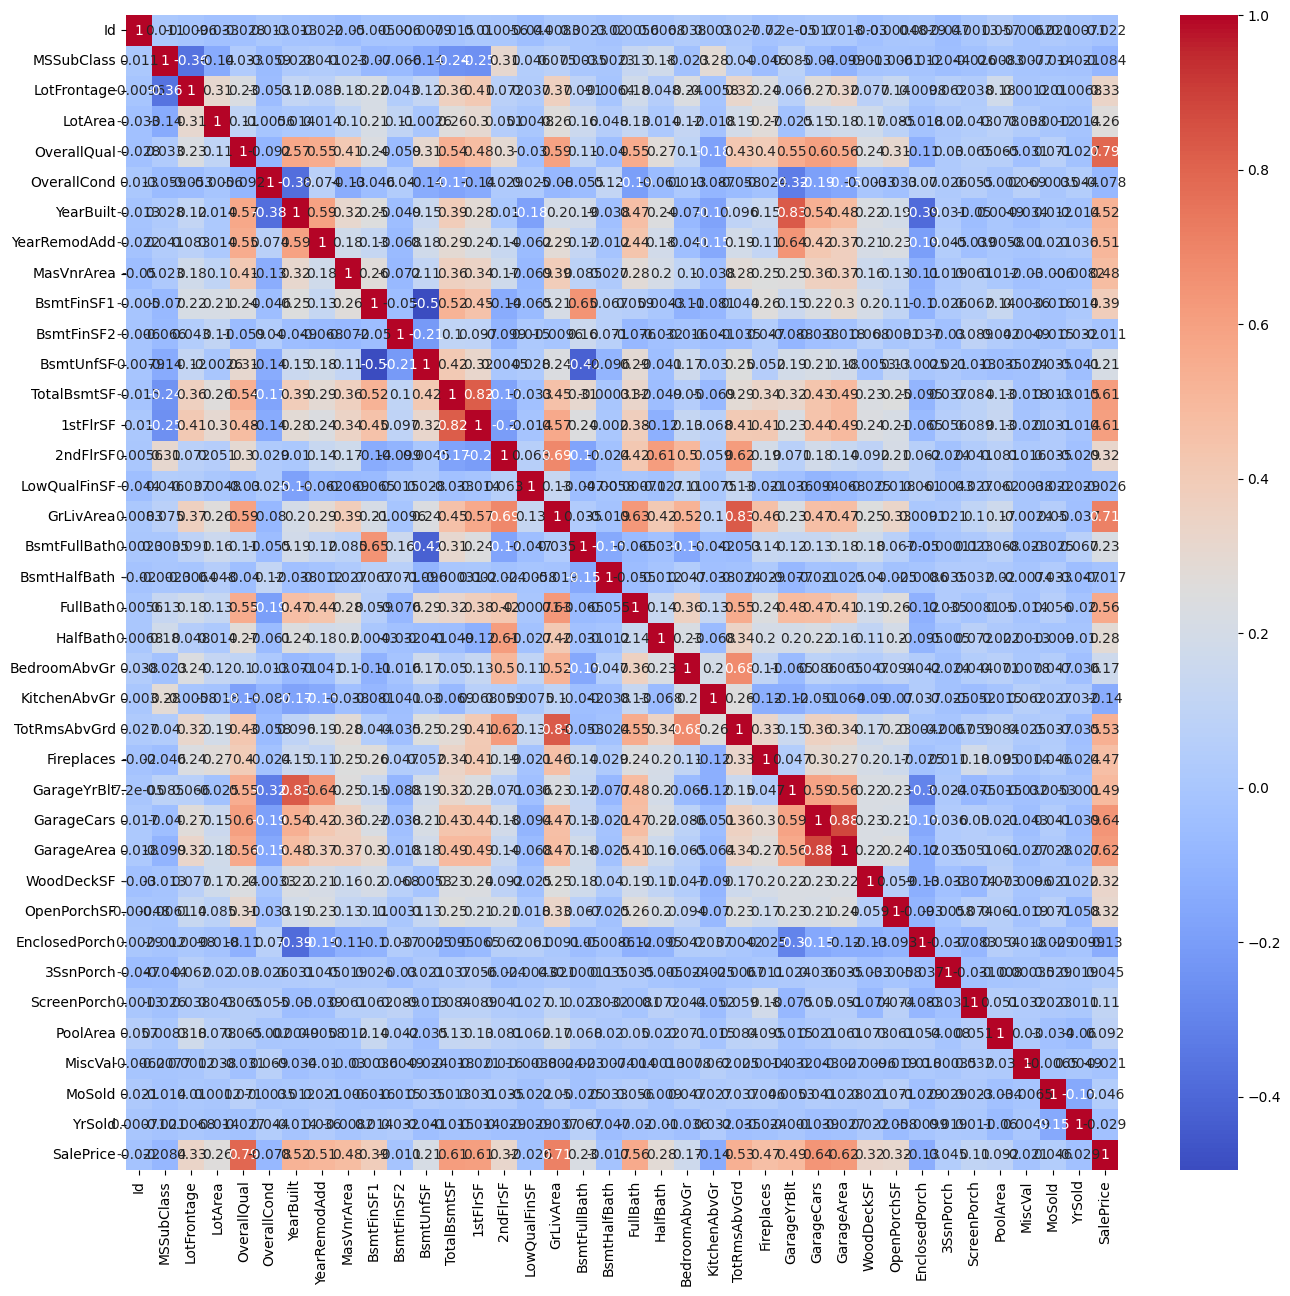

In [ ]:
# 数値型の列だけを抽出
numeric_df = df_train.select_dtypes(include=['number'])

fig, ax = plt.subplots(figsize=(16, 15))

# ヒートマップを作成
sns.heatmap(numeric_df.corr(),annot=True, cmap='coolwarm')
plt.show()

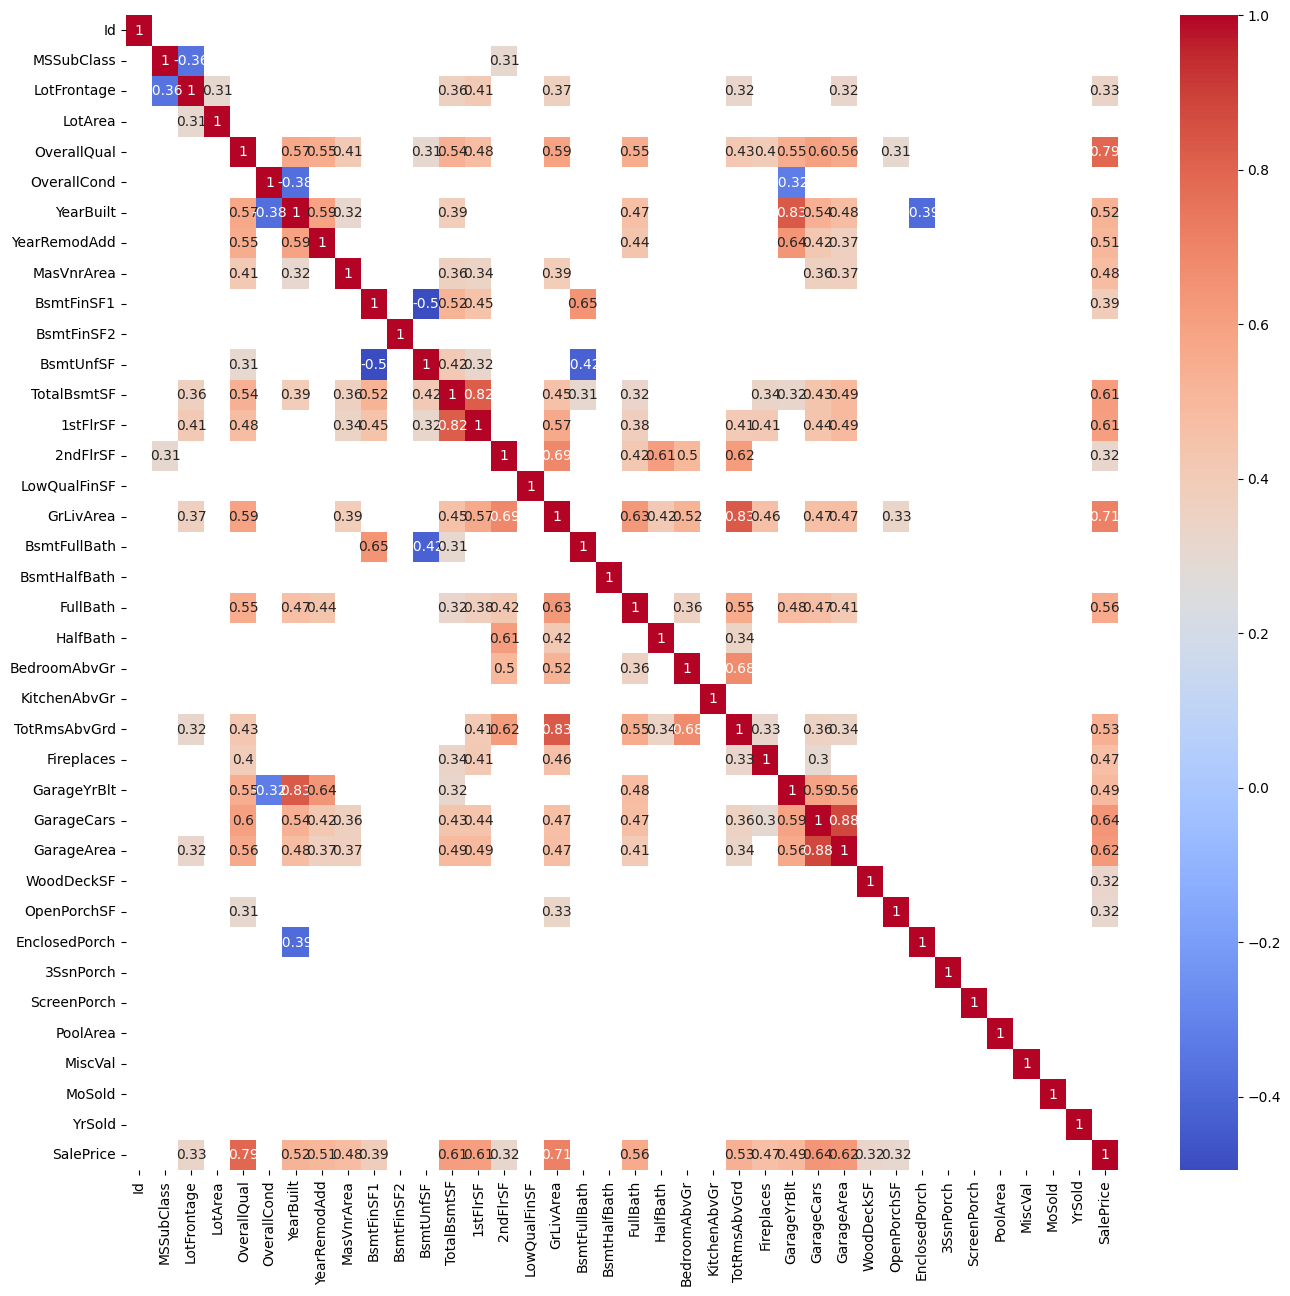

In [ ]:
# 相関行列を作成
corr_matrix = numeric_df.corr()

# 絶対値が0.3未満の相関をマスク
mask = np.abs(corr_matrix) < 0.3

fig, ax = plt.subplots(figsize=(16, 15))

# ヒートマップを作成
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask)
plt.show()

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

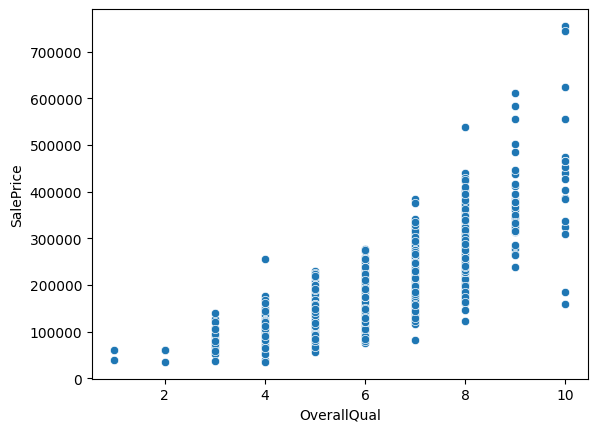

In [ ]:
sns.scatterplot(x='OverallQual', y='SalePrice', data=df_train)

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

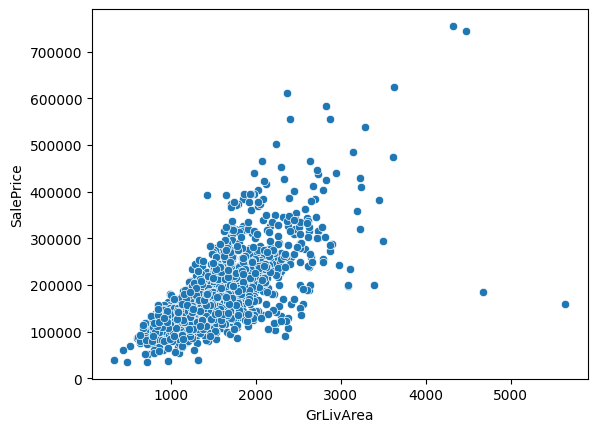

In [ ]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_train)

In [ ]:
# LotAreaに対するGarageAreaの割合を計算
df_train['GarageAreaRatio'] = df_train['GarageArea'] / df_train['LotArea']
df_test['GarageAreaRatio'] = df_test['GarageArea'] / df_test['LotArea']

In [ ]:
df_train['GarageQual'].value_counts()

,count
GarageQual,
TA,1311
Fa,48
Gd,14
Ex,3
Po,3


In [ ]:
df_test['GarageQual'].value_counts()

,count
GarageQual,
TA,1293
Fa,76
Gd,10
Po,2


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_train['GarageQual'] = le.fit_transform(df_train['GarageQual'])
df_test['GarageQual'] = le.transform(df_test['GarageQual'])

In [ ]:
df_train['GarageQual']

,GarageQual
0,4
1,4
2,4
3,4
4,4
...,...
1455,4
1456,4
1457,4
1458,4


In [ ]:
df_train['SaleCondition'] = le.fit_transform(df_train['SaleCondition'])
df_test['SaleCondition'] = le.transform(df_test['SaleCondition'])

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageAreaRatio
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,4,208500,0.064852
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,4,181500,0.047917
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,4,223500,0.054044
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,0,140000,0.067225
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,4,250000,0.058626


In [ ]:
!pip install xgboost==1.7.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 2.7 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.1
    Uninstalling xgboost-2.1.1:
      Successfully uninstalled xgboost-2.1.1


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
X_numeric = df_train.select_dtypes(include=['number']).drop('SalePrice', axis=1)
y = df_train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
# 'MSSubClass','LotArea','BedroomAbvGr','SaleCondition'
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

In [ ]:
model = xgb.train(params, dtrain, num_boost_round=100)

In [ ]:
y_pred = model.predict(dtest)

In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE: ", rmse)

RMSE:  32902.86730815732


In [ ]:
test_numeric = df_test.select_dtypes(include=['number'])
dsubmit = xgb.DMatrix(test_numeric, enable_categorical=True)
predictions = model.predict(dsubmit)

submission_df = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': predictions})
submission_df.to_csv('submission.csv', index=False)